In [1]:
# import libary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm

# used for ML
from sklearn.preprocessing import StandardScaler,  OrdinalEncoder, OneHotEncoder, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae



In [3]:
# load data file in pandas
raw_data = pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv", index_col=0)
work_data = raw_data

In [4]:
# sns.pairplot(work_data)

In [5]:
# counting nan values to decide which ones could remove
for i in work_data.columns:
    print(i, work_data[i].isnull().sum())

Customer 0
State 631
Customer Lifetime Value 0
Response 631
Coverage 0
Education 0
Effective To Date 0
EmploymentStatus 0
Gender 0
Income 0
Location Code 0
Marital Status 0
Monthly Premium Auto 0
Months Since Last Claim 633
Months Since Policy Inception 0
Number of Open Complaints 633
Number of Policies 0
Policy Type 0
Policy 0
Renew Offer Type 0
Sales Channel 0
Total Claim Amount 0
Vehicle Class 622
Vehicle Size 622
Vehicle Type 5482


In [6]:
# lower column names
work_data.columns = work_data.columns.str.lower()

#lower values
for i in work_data:
    if work_data[i].dtype == 'object':
        work_data[i] = work_data[i].str.lower()

work_data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,dk49336,arizona,4809.216960,no,basic,college,2/18/11,employed,m,48029,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN
1,kx64629,california,2228.525238,no,basic,college,1/18/11,unemployed,f,0,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN
2,lz68649,washington,14947.917300,no,basic,bachelor,2/10/11,employed,m,22139,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,a
3,xl78013,oregon,22332.439460,yes,extended,college,1/11/11,employed,m,49078,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,a
4,qa50777,oregon,9025.067525,no,premium,bachelor,1/17/11,medical leave,f,23675,...,NaN,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,fe99816,nevada,15563.369440,no,premium,bachelor,1/19/11,unemployed,f,0,...,NaN,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,a
10906,kx53892,oregon,5259.444853,no,basic,college,1/6/11,employed,f,61146,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,a
10907,tl39050,arizona,23893.304100,no,extended,bachelor,2/6/11,employed,f,39837,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,NaN
10908,wa60547,california,11971.977650,no,premium,college,2/13/11,employed,f,64195,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,a


In [7]:
# drop not neccesary columns

# 1. customer, effective to date
# 2. vehicle types as it holds more than 4500 nan values

# first try
#work_data.drop(columns=['customer','vehicle type', 'renew offer type', 'policy type', 'policy', 'effective to date'], inplace=True)

# second try with more columns -> keep policy type and policy
work_data.drop(columns=['customer', 'vehicle type', 'policy', 'effective to date'], inplace=True)
#work_data

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly premium auto'}>],
       [<AxesSubplot:title={'center':'months since last claim'}>,
        <AxesSubplot:title={'center':'months since policy inception'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>],
       [<AxesSubplot:title={'center':'number of policies'}>,
        <AxesSubplot:title={'center':'total claim amount'}>,
        <AxesSubplot:>]], dtype=object)

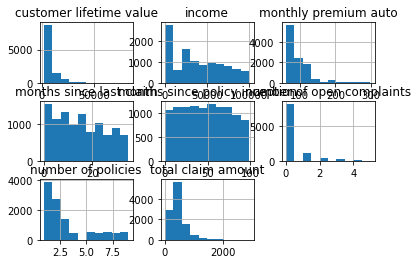

In [8]:
work_data.hist()

In [9]:
work_data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
work_data.head()

#drop rows in state where nan
work_data.dropna(subset=['state', 'vehicle size', 'number of open complaints'], inplace=True)

In [11]:
work_data['income'].describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

In [12]:
# with usage R2 is near 78 %

# work_data['income'] = work_data['income'].replace(0, work_data['income'].mean())

#### ! reaching more than 78 %

In [13]:
# reduce using data set, where income row are between 1-3 percentil

right_border = work_data['income'].quantile(0.75)
left_border = work_data['income'].quantile(0.25)

In [14]:
work_data = work_data[work_data['income'] < right_border]

work_data = work_data[work_data['income'] > left_border]

In [15]:
work_data.income.describe()

count     4533.000000
mean     35909.996029
std      14073.434351
min      10037.000000
25%      24350.000000
50%      34137.000000
75%      47950.000000
max      62302.000000
Name: income, dtype: float64

In [16]:
# fill wierd values
# income = 0
#work_data.income.describe()



#work_data['months since last claim'] = work_data['months since last claim'].replace(np.nan, work_data['months since last claim'])

work_data['months since last claim'] = work_data['months since last claim'].fillna(0)
work_data['number of open complaints'] = work_data['number of open complaints'].fillna(0)

### copy dataset for later modification and usage 

In [17]:
numerical_data = work_data._get_numeric_data()
loop_test_data = work_data.copy()
x = pd.DataFrame()

In [ ]:
income = loop_test_data['income']
state = loop_test_data['state']

### from here we ignore the labs which was done during the lab

In [ ]:
# create list with categorical data
cat_norm = ['state','response', 'employmentstatus','gender', 'location code', 'sales channel', 'vehicle class', 'marital status']

In [ ]:
# set ordonal values

print(work_data['education'].unique())
print(work_data['coverage'].unique())
print(work_data['vehicle size'].unique())
print(work_data['number of open complaints'].unique())

work_data.columns

#raw_data

In [ ]:
enc = OrdinalEncoder()
edu = [['high school or below', 0], ['college', 1], ['bachelor', 2], ['master', 3], ['doctor', 4]]
veh_size = [['small',0], ['medsize',1], ['larger',2]]
cov = [['basic',0], ['extended',1], ['premium',2]]

enc.fit(edu)
work_data['education'] = enc.fit_transform(work_data['education'].values.reshape(-1,1))

enc.fit(veh_size)
work_data['vehicle size'] = enc.fit_transform(work_data['vehicle size'].values.reshape(-1,1))

enc.fit(cov)
work_data['coverage'] = enc.fit_transform(work_data['coverage'].values.reshape(-1,1))


In [ ]:
print(work_data['education'].unique())
print(work_data['coverage'].unique())
print(work_data['vehicle size'].unique())
print(work_data['number of open complaints'].unique())

In [ ]:
# set dummies values on all 
work_data = pd.get_dummies(work_data,cat_norm)


In [ ]:
# check if datatypes fits
work_data.dtypes.unique()

In [ ]:
# split x/y

y = work_data['total claim amount']
x = work_data.drop(columns='total claim amount')

In [ ]:
# scale x
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x))

In [ ]:
# check x
x

In [ ]:
raw_data.hist(figsize=(14,14))

In [ ]:
# split dataset -> train 80% to test 20%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20)

In [ ]:
# create model and apply
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

In [ ]:
x_train = sm.add_constant(x_train) # adding a constant
model = sm.OLS(list(y_train), x_train).fit()
predictions = model.predict(x_train) 

print_model = model.summary()
print_model

In [ ]:
# getting the R-score
print(linear_model.score(x,y))

In [ ]:
y_pred = linear_model.predict(x_test)

In [ ]:
print('mae:', mae(y_true = y_test, y_pred = y_pred))
print('mse:', mse(y_true = y_test,y_pred = y_pred))
print('r2:',r2_score(y_true = y_test, y_pred = y_pred))

In [ ]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly premium auto'}>],
       [<AxesSubplot:title={'center':'months since last claim'}>,
        <AxesSubplot:title={'center':'months since policy inception'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>],
       [<AxesSubplot:title={'center':'number of policies'}>,
        <AxesSubplot:title={'center':'total claim amount'}>,
        <AxesSubplot:>]], dtype=object)

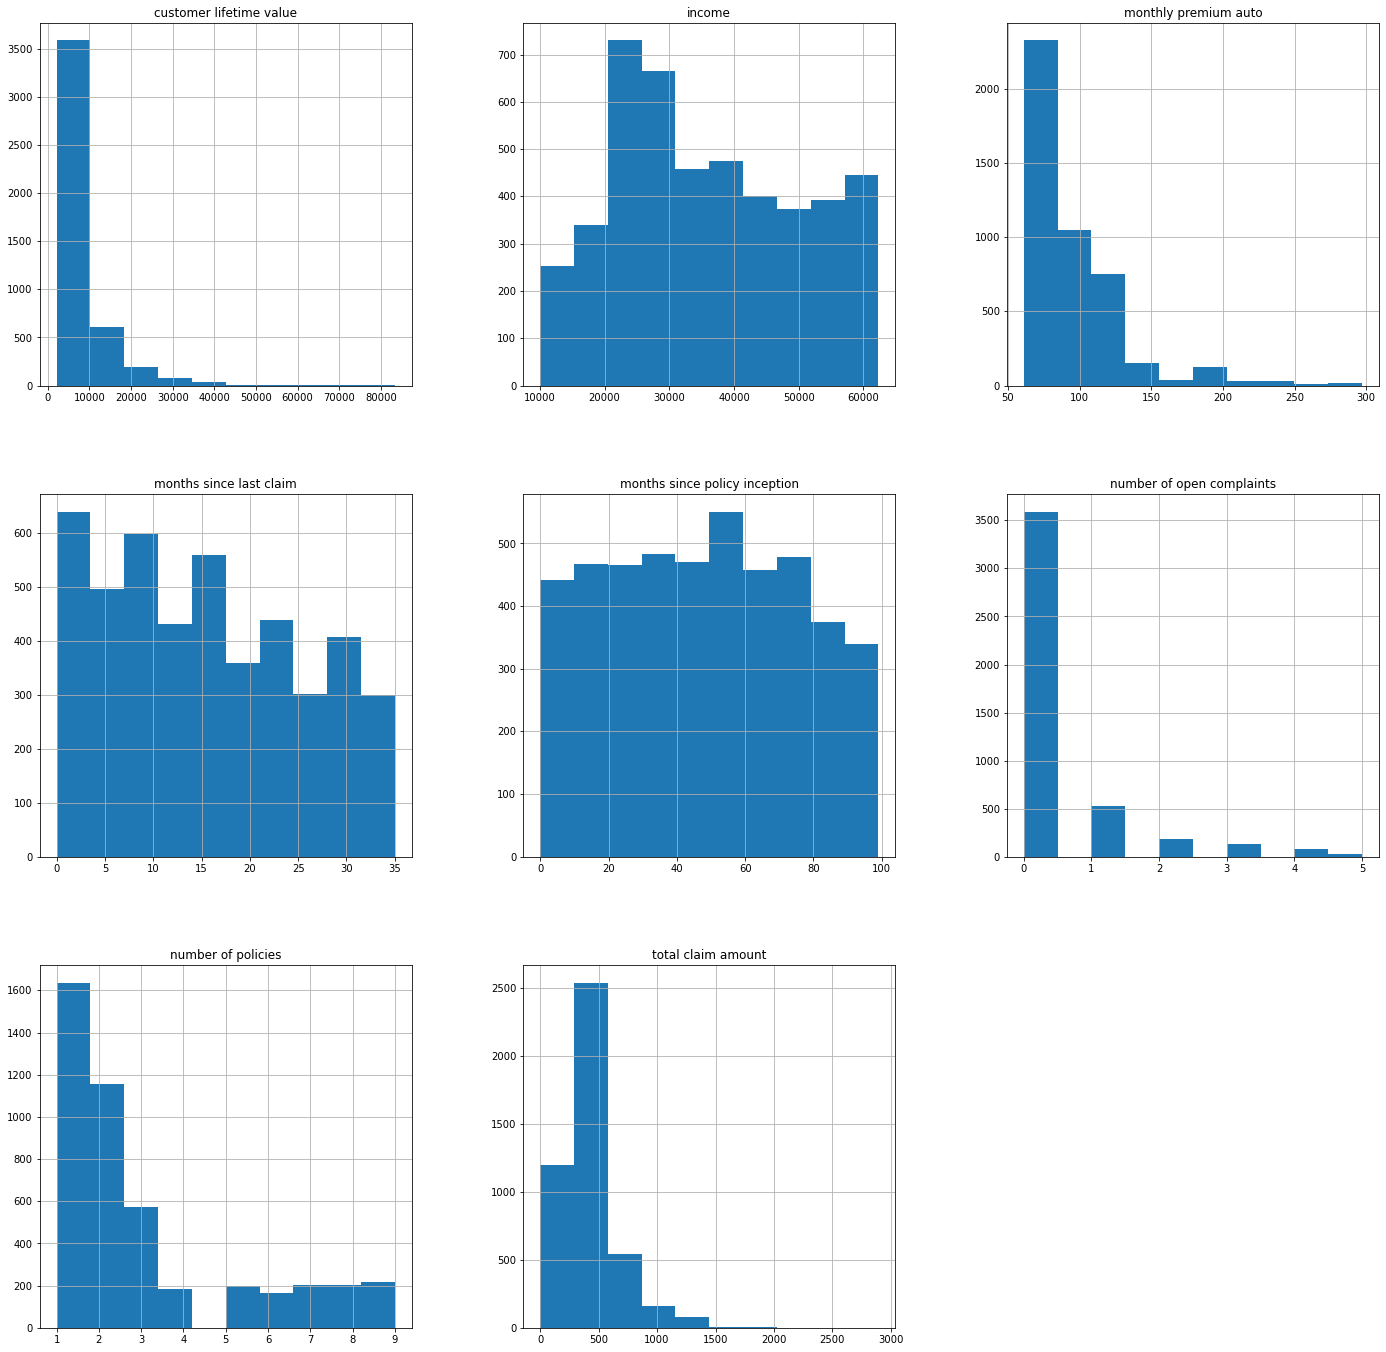

In [18]:
loop_test_data.hist(figsize=(24,24))

In [19]:

# pt = PowerTransformer(method='box-cox', )
# loop_test_data['customer lifetime value'] = pt.fit_transform(loop_test_data['customer lifetime value'].to_numpy().reshape(-1,1))
# loop_test_data['monthly premium auto'] = pt.fit_transform(loop_test_data['monthly premium auto'].to_numpy().reshape(-1,1))
# loop_test_data['number of policies'] = pt.fit_transform(loop_test_data['number of policies'].to_numpy().reshape(-1,1))
# loop_test_data['months since last claim'] = pt.fit_transform(loop_test_data['months since last claim'].to_numpy().reshape(-1,1))

#loop_test_data['monthly premium auto'].hist()



<AxesSubplot:xlabel='customer lifetime value', ylabel='Count'>

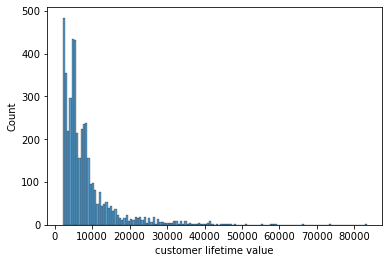

In [20]:
sns.histplot(loop_test_data['customer lifetime value'])

In [21]:
# x = pd.concat([income, state], axis=1)

## How to make it complicated

#### creating a base function for running a single set ***(data + scalertype + model)***

> input: 
>
>       x_data: cleaned x_data, with preferd series/columns
>
>       y_data: result series
>
>       scaler: scalermodel -> instance e.g s=StandartScaler()
>
>       model: type of model -> instance e.g m=LinearRegression()
>
>  output:
>
>       - used columns as list
>
>       - Dictonary holding MSE, MAE and R2 value from this solution

In [22]:
def linear_solver(x_data, y_data, scaler, model):
    
    # store used column names for later processing
    used_columns = x_data.columns 

    # scale given dataset
    
    x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size= 0.20, random_state=100)

    scaler_train = scaler.fit(x_train)
    x_train = scaler_train.transform(x_train)
    x_test = scaler_train.transform(x_test)
    
    #x = pd.DataFrame(scaler.fit_transform(x_data))
    y = y_data


    # fit to model
    
    
    model.fit(x_train, y_train)
    
    # create predictions
    y_pred = model.predict(x_test)

    # get results 
    results = {}
    results['mse'] = mse(y_true = y_test,y_pred = y_pred)
    results['mae'] = mae(y_true = y_test, y_pred = y_pred)
    results['R2'] = r2_score(y_true = y_test, y_pred = y_pred)


    return used_columns, results, y_pred

#### How to use

> create lists of data, seperated in numerical, ordonal categories and normal categegies 
>
> iterate over the range of data_types, where the income is fixed and just add different series of data
>
> create predictions 
>
> compare the results with respect to its different iterations

### prepare lists of data types for iteration

#### numerical

In [23]:
numerical_data.describe()

#loop_test_data['customer lifetime value'].sort_values(ascending=False).head(50)
#l.sort_values(ascending=False)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000
mean,8139.885543,35909.996029,93.532098,15.200088,47.836532,0.377454,2.950364,412.621169
std,7030.247433,14073.434351,35.648601,9.977131,27.660563,0.892646,2.407871,261.468335
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.517753
25%,4087.512572,24350.000000,68.000000,6.000000,24.000000,0.000000,1.000000,278.735779
50%,5821.787383,34137.000000,83.000000,14.000000,48.000000,0.000000,2.000000,364.800000
75%,9095.049868,47950.000000,109.000000,23.000000,71.000000,0.000000,4.000000,528.000000
max,83325.381190,62302.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [24]:
# handle numerical series

list_numerical_data = list(numerical_data)
list_numerical_data.pop(list_numerical_data.index('total claim amount')) # as this is going to be the y-axis
list_numerical_data.pop(list_numerical_data.index('income')) # as this is the minimum required data...no income -> normaly no car ^^

#list_numerical_data.pop(list_numerical_data.index('monthly premium auto'))
#list_numerical_data.pop(list_numerical_data.index('number of policies'))

element_count_numerical = len(list_numerical_data)
element_count_numerical

6

#### list categories in unorderd type...not rankable

In [25]:
list_cat_normal = [ \
        'state',
        'response',
        'employmentstatus',
        'gender',
        'location code',
        'sales channel',
        'vehicle class',
        'marital status',
        'renew offer type']
element_count_category_norm = len(list_cat_normal)
element_count_category_norm

9

#### dic of categories which can be ranked

> remind, still room for imrpvement e.g simplfy by grouping

In [26]:
dic_cat_ordonal = {\
    'education':[['high school or below', 0], ['college', 1], ['bachelor', 2], ['master', 3], ['doctor', 4]],
    'vehicle size': [['small', 0], ['medsize', 1], ['larger',2]],
    'coverage': [['basic', 0], ['extended', 1], ['premium', 2]],
    'policy type': [['personal auto', 0], ['corporate auto', 1], ['special auto', 2]]
    }

element_count_category_ordonal = len(dic_cat_ordonal)
element_count_category_ordonal

4

#### create function to pass ordinal categories to work data

In [27]:
enc = OrdinalEncoder()

def create_cat_ordinal_data(data_set, k, v):
    #print('create ordinal ', k,v)
    enc.fit(v)
    data_set[k] = enc.fit_transform(data_set[k].values.reshape(-1,1))
    return data_set

### create test case loop

In [28]:

# create an emtpy data frame
x_data = pd.DataFrame()


def loop_cat_ord(count, data):

    for k,v in dic_cat_ordonal.items():
        if count == 0:
            break
        data = pd.concat([data, loop_test_data[k]], axis=1)    
        data = create_cat_ordinal_data(data, k, v)

        count -= 1
    #print(data)
    return data


def loop_cat_norma(count, data):
    for l_cat in list_cat_normal:
        if count == 0:
            break

        data = pd.concat([data, loop_test_data[l_cat]], axis=1)
        data = pd.get_dummies(data,l_cat)
        count -= 1
        
    #print('loop cat', data)
    return data


def loop_numeric(count, data):
    for numeric in list_numerical_data:
        if count == 0: 
            break
        
        data = pd.concat([data, loop_test_data[numeric]], axis=1)
        count -= 1
        
    #print('loop numeric', data.count())
    return data


In [29]:

scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = MinMaxScaler()
model = LinearRegression()

x_data = pd.DataFrame()

def test_run(num: int, cat_n: int, cat_ord: int):
    
    x_data = pd.DataFrame()    
    x_data = pd.concat([x_data, loop_test_data['income']], axis=1) # income is mandatory and 

    
    x_data = loop_numeric(num, x_data)
    
    x_data = loop_cat_norma(cat_n, x_data)
    
    x_data = loop_cat_ord(cat_ord, x_data)

    y = loop_test_data['total claim amount']

    head, res, y_pred = linear_solver(x_data, y, scaler, model)
    
    return head, res, y_pred

#### series count

> numerical: 6
>
> cat unorderd: 8
>
> cat orderd: 3
>
> (6 + 1) \* (9 + 1) \* (4 + 1) = 350 possibilties

In [30]:
(6+1)*(9+1)*(4+1)

350

In [31]:
n = element_count_numerical + 1
c = element_count_category_norm + 1
a = element_count_category_ordonal + 1 

combined = [(n1,c2,a3) for n1 in range(n) for c2 in range(c) for a3 in range(a)]

In [32]:
print('start', combined[0:5])
print('end',combined[-5:])
print('length', len(combined))

start [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4)]
end [(6, 9, 0), (6, 9, 1), (6, 9, 2), (6, 9, 3), (6, 9, 4)]
length 350


#### run tescases 

In [40]:

k = []
v = []
for n, ca, co in tqdm(combined):
    name, res, _ = test_run(n, ca, co)
    k.append(name)
    v.append(res)


  0%|          | 0/350 [00:00<?, ?it/s]

In [34]:
#store results in dataframe
values = pd.DataFrame(v)
index_v = pd.DataFrame(k)


In [35]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Show top 20 with lowest combination

In [36]:
complete = pd.concat([index_v, values], axis=1)
complete.sort_values(by='R2', ascending=False).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,mse,mae,R2
283,income,customer lifetime value,monthly premium auto,months since last claim,months since policy inception,number of open complaints,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,employmentstatus_disabled,employmentstatus_employed,employmentstatus_medical leave,employmentstatus_retired,gender_f,gender_m,location code_rural,location code_suburban,location code_urban,sales channel_agent,sales channel_branch,sales channel_call center,sales channel_web,education,vehicle size,coverage,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,9510.066941,75.098466,0.832336
229,income,customer lifetime value,monthly premium auto,months since last claim,months since policy inception,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,employmentstatus_disabled,employmentstatus_employed,employmentstatus_medical leave,employmentstatus_retired,gender_f,gender_m,location code_rural,location code_suburban,location code_urban,education,vehicle size,coverage,policy type,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,9527.514639,75.159465,0.832029
179,income,customer lifetime value,monthly premium auto,months since last claim,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,employmentstatus_disabled,employmentstatus_employed,employmentstatus_medical leave,employmentstatus_retired,gender_f,gender_m,location code_rural,location code_suburban,location code_urban,education,vehicle size,coverage,policy type,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,9527.880420,75.117476,0.832022
129,income,customer lifetime value,monthly premium auto,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,employmentstatus_disabled,employmentstatus_employed,employmentstatus_medical leave,employmentstatus_retired,gender_f,gender_m,location code_rural,location code_suburban,location code_urban,education,vehicle size,coverage,policy type,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,9532.578418,74.686443,0.831939
177,income,customer lifetime value,monthly premium auto,months since last claim,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,employmentstatus_disabled,employmentstatus_employed,employmentstatus_medical leave,employmentstatus_retired,gender_f,gender_m,location code_rural,location code_suburban,location code_urban,education,vehicle size,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,9533.068572,75.142857,0.831931
184,income,customer lifetime value,monthly premium auto,months since last claim,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,employmentstatus_disabled,employmentstatus_employed,employmentstatus_medical leave,employmentstatus_retired,gender_f,gender_m,location code_rural,location code_suburban,location code_urban,sales channel_agent,sales channel_branch,sales channel_call center,sales channel_web,education,vehicle size,coverage,policy type,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,9543.239011,75.058940,0.831751
329,income,customer lifetime value,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,employmentstatus_disabled,employmentstatus_employed,employmentstatus_medical leave,employmentstatus_retired,gender_f,gender_m,location code_rural,location code_suburban,location code_urban,e

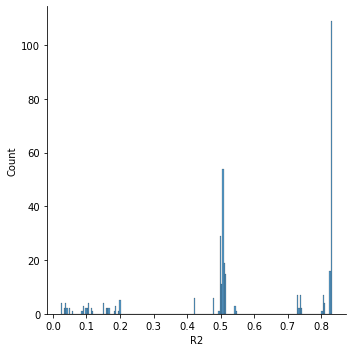

In [37]:
sns.displot(complete['R2'], bins= 200)

In [38]:
print(complete.iloc[175], combined[175])

0                              income
1             customer lifetime value
2                monthly premium auto
3             months since last claim
4                       state_arizona
5                    state_california
6                        state_nevada
7                        state_oregon
8                    state_washington
9                         response_no
10                       response_yes
11          employmentstatus_disabled
12          employmentstatus_employed
13     employmentstatus_medical leave
14           employmentstatus_retired
15                           gender_f
16                           gender_m
17                location code_rural
18             location code_suburban
19                location code_urban
20                               None
21                               None
22                               None
23                               None
24                               None
25                               None
26          

In [39]:
#test_run(combined[240][0], combined[240][1], combined[240][2])
test_run(combined[175][0], combined[175][1], combined[175][2])

(Index(['income', 'customer lifetime value', 'monthly premium auto', 'months since last claim', 'state_arizona', 'state_california', 'state_nevada', 'state_oregon', 'state_washington', 'response_no', 'response_yes', 'employmentstatus_disabled', 'employmentstatus_employed', 'employmentstatus_medical leave', 'employmentstatus_retired', 'gender_f', 'gender_m', 'location code_rural', 'location code_suburban', 'location code_urban'], dtype='object'),
 {'mse': 9561.801804429282,
  'mae': 75.30473897360062,
  'R2': 0.8314240397791397},
 array([ 3.93819820e+02,  4.45319820e+02,  4.61319820e+02,  2.11569820e+02,
         4.26319820e+02,  2.12819820e+02,  5.16944820e+02,  1.38694482e+03,
         2.84448201e+01,  4.23569820e+02,  5.23069820e+02,  4.83944820e+02,
         5.54944820e+02,  5.36069820e+02,  4.08444820e+02,  5.51319820e+02,
         6.88694820e+02,  2.25319820e+02,  2.22319820e+02,  4.91944820e+02,
         4.18444820e+02,  6.76944820e+02,  6.25819820e+02,  3.75694820e+02,
         